In [7]:
import json
import jsonschema
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def create_add(df, col):
    return df.apply(
        lambda row: row[col]-df[
            df["date"]==row["date"] - pd.Timedelta(1, unit='D')
        ][col].max(),
        axis=1
    )

In [9]:
dfs = []
for month in ["2020.08","2020.09","2020.10","2020.11","2020.12"]:
    with open("data/kpi_hu/{}.json".format(month), 'r') as myfile:
        data_json = json.load(myfile)
        dfs.append(pd.json_normalize(data_json.values()))
df = pd.concat(dfs)
reduced_df = df[["update","tests","infected_pest","infected_other"]].copy()
reduced_df["update"] = pd.to_datetime(reduced_df["update"], format='%Y.%m.%d. %H:%M')
reduced_df["date"] = reduced_df["update"].dt.date
reduced_df["infected"] = reduced_df["infected_pest"]+reduced_df["infected_other"]
reduced_df["add.tests"] = create_add(reduced_df, "tests")
reduced_df["add.infected"] = create_add(reduced_df, "infected")
reduced_df["add.infected/add.tests"] = reduced_df["add.infected"] / reduced_df["add.tests"] * 100
reduced_df.tail()

,update,tests,infected_pest,infected_other,date,infected,add.tests,add.infected,add.infected/add.tests
27,2020-12-27 08:50:00,2610590,32772,143821,2020-12-27,176593,3292.0,-3336.0,-101.336574
28,2020-12-28 08:45:00,2615237,32505,140659,2020-12-28,173164,4647.0,-3429.0,-73.789542
29,2020-12-29 08:43:00,2621427,31966,137948,2020-12-29,169914,6190.0,-3250.0,-52.504039
30,2020-12-30 08:49:00,2639729,31243,134637,2020-12-30,165880,18302.0,-4034.0,-22.041307
31,2020-12-31 09:22:00,2657119,30321,132554,2020-12-31,162875,17390.0,-3005.0,-17.280046


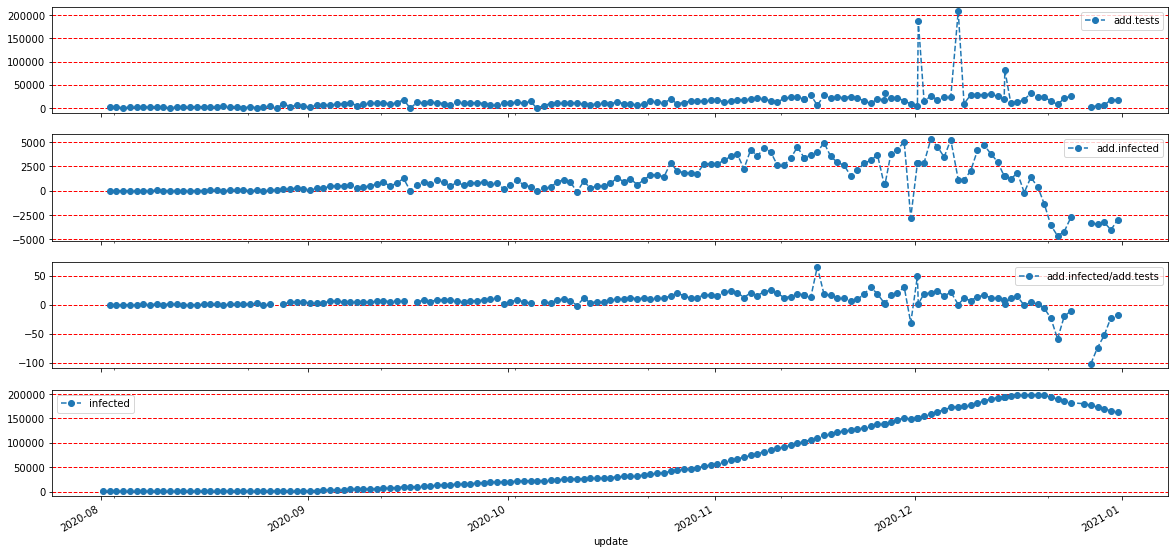

In [10]:
fig, ax = plt.subplots(nrows=4,figsize=(20,10),sharex=True)
#ax[0].set_ylim(0,2100)
#ax[1].set_ylim(1,100)
#ax[1].set_yscale("log")
#ax[2].set_ylim(0,10)
#ax[2].set_yscale("log")
reduced_df.plot(x="update", y="add.tests", ax=ax[0], label="add.tests", style="o--")
reduced_df.plot(x="update", y="add.infected", ax=ax[1], label="add.infected", style="o--")
reduced_df.plot(x="update", y="add.infected/add.tests", ax=ax[2], label="add.infected/add.tests", style="o--")
reduced_df.plot(x="update", y="infected", ax=ax[3], label="infected", style="o--")
ax[0].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[1].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[2].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[3].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
plt.show()